James' Project--Code

Firstly we need to import those pkgs and read the csv document from my file.
If you want to run this code on your computer you need to download the data first.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'/Users/jameszhang/Downloads/Data-Collisions.csv')
df.head(5)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Next we want to pick those variables we need from all the 38 variables using the dataframe operation.

In [2]:
df=df[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','SDOT_COLCODE','UNDERINFL','INATTENTIONIND','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]

Next we need to deal with those blank columns. After observing the raw data, we can find that in different columns the meaning of blank are different. Therefore, we need to drop the blank rows or change the blank value to 0 based on which column it is.

In [3]:
df['INATTENTIONIND']=df['INATTENTIONIND'].fillna(0)
df['PEDROWNOTGRNT']=df['PEDROWNOTGRNT'].fillna(0)
df['SPEEDING']=df['SPEEDING'].fillna(0)
df=df.dropna()

Now we check whether there is null in all those columns.

In [4]:
df.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
SDOT_COLCODE      0
UNDERINFL         0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
HITPARKEDCAR      0
dtype: int64

After checking there is no null in all variables, we need to change all the columns from string to int. For those categorical variables, we can use a int from 0 to represent those strings.

In [5]:
df['ADDRTYPE']=df['ADDRTYPE'].replace({'Block':0,'Intersection':1,'Alley':2})
df['ADDRTYPE'].astype('int')

df['COLLISIONTYPE']=df['COLLISIONTYPE'].replace({'Parked Car':0,'Angles':1,'Rear Ended':2,'Other':3,'Sideswipe':4,'Left Turn':5,'Pedestrian':6,'Cycles':7,'Right Turn':8,'Head On':9})
df['COLLISIONTYPE'].astype('int')

df['JUNCTIONTYPE']=df['JUNCTIONTYPE'].replace({'Mid-Block (not related to intersection)':0,'At Intersection (intersection related)':1,'Mid-Block (but intersection related)':2,'Driveway Junction':3,'At Intersection (but not related to intersection)':4,'Ramp Junction':5,'Unknown':6})
df['JUNCTIONTYPE'].astype('int')

df['UNDERINFL']=df['UNDERINFL'].replace({'0':0,'1':1,'N':0,'Y':1})
df['UNDERINFL'].astype('int')

df['INATTENTIONIND']=df['INATTENTIONIND'].replace({'Y':1})
df['INATTENTIONIND'].astype('int')

df['WEATHER']=df['WEATHER'].replace({'Clear':0,'Raining':1,'Overcast':2,'Unknown':3,'Snowing':4,'Other':5,'Fog/Smog/Smoke':6,'Sleet/Hail/Freezing Rain':7,'Blowing Sand/Dirt':8,'Severe Crosswind':9,'Partly Cloudy':10})
df['WEATHER'].astype('int')

df['ROADCOND']=df['ROADCOND'].replace({'Dry':0,'Wet':1,'Unknown':2,'Ice':3,'Snow/Slush':4,'Other':5,'Standing Water':6,'Sand/Mud/Dirt':7,'Oil':8})
df['ROADCOND'].astype('int')

df['LIGHTCOND']=df['LIGHTCOND'].replace({'Daylight':0,'Dark - Street Lights On':1,'Unknown':2,'Dusk':3,'Dawn':4,'Dark - No Street Lights':5,'Dark - Street Lights Off':6,'Other':7,'Dark - Unknown Lighting':8})
df['LIGHTCOND'].astype('int')

df['PEDROWNOTGRNT']=df['PEDROWNOTGRNT'].replace({'Y':1})
df['PEDROWNOTGRNT'].astype('int')

df['SPEEDING']=df['SPEEDING'].replace({'Y':1})
df['SPEEDING'].astype('int')

df['HITPARKEDCAR']=df['HITPARKEDCAR'].replace({'N':0,'Y':1})
df['HITPARKEDCAR'].astype('int')

0         0
1         0
2         0
3         0
4         0
         ..
194668    0
194669    0
194670    0
194671    0
194672    0
Name: HITPARKEDCAR, Length: 182895, dtype: int64

We then can use the dtype to check whether all the columns are changed to int that can be used in the machine learning method.

In [7]:
df.dtypes

SEVERITYCODE      int64
ADDRTYPE          int64
COLLISIONTYPE     int64
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE      int64
SDOT_COLCODE      int64
UNDERINFL         int64
INATTENTIONIND    int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
PEDROWNOTGRNT     int64
SPEEDING          int64
HITPARKEDCAR      int64
dtype: object

Therefore we can then use data visualization skills to see the displot of these variables.

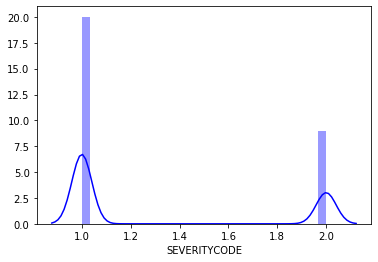

In [8]:
sns.distplot(df['SEVERITYCODE'],color="b")

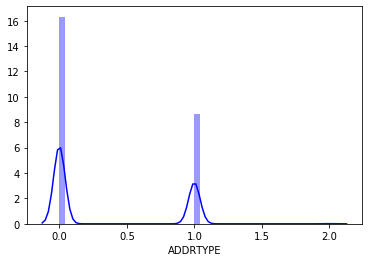

In [9]:
sns.distplot(df['ADDRTYPE'],color="b")

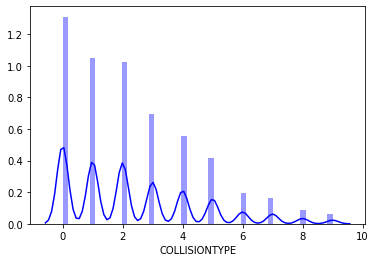

In [10]:
sns.distplot(df['COLLISIONTYPE'],color="b")

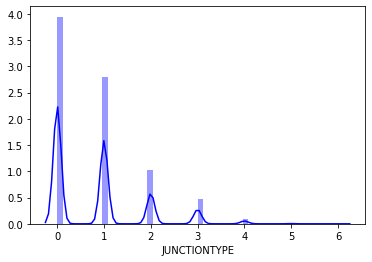

In [11]:
sns.distplot(df['JUNCTIONTYPE'],color="b")

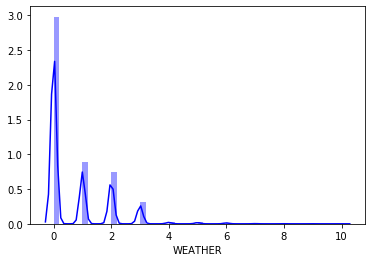

In [12]:
sns.distplot(df['WEATHER'],color="b")

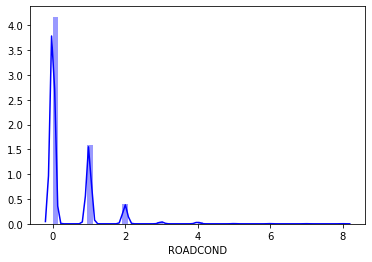

In [13]:
sns.distplot(df['ROADCOND'],color="b")

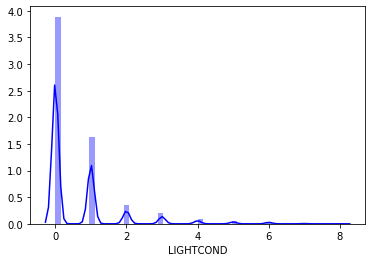

In [14]:
sns.distplot(df['LIGHTCOND'],color="b")

Next we can apply the machine learning method. Firstly, we transform the dataframe into depedent variables and independent variables.
They are all arrays.

In [16]:
X=df[['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','SDOT_COLCODE','UNDERINFL','INATTENTIONIND','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']].values
X[0:5]

array([[ 1,  1,  2,  0,  0,  2,  1, 11,  0,  0,  2,  1,  0,  0,  0,  0],
       [ 0,  4,  2,  0,  0,  2,  0, 16,  0,  0,  1,  1,  1,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  3,  0, 14,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  3,  3,  0,  0,  3,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  2,  0,  0,  2,  1, 11,  0,  0,  1,  1,  0,  0,  0,  0]])

In [17]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

using the preprocessing pkg to normalize the data

In [18]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.35912781, -0.62852427, -0.34741051, -0.19213251, -0.17401012,
         0.04974136,  0.2095603 , -0.51842213, -0.22745818, -0.43594564,
         1.17761461,  0.77050967, -0.57960966, -0.16144554, -0.23005211,
        -0.17919181],
       [-0.72753333,  0.76737798, -0.34741051, -0.19213251, -0.17401012,
         0.04974136, -0.84339384,  0.25203914, -0.22745818, -0.43594564,
         0.24857254,  0.77050967,  0.37221627, -0.16144554, -0.23005211,
        -0.17919181],
       [-0.72753333, -1.09382502,  1.11147673, -0.19213251, -0.17401012,
         1.82519929, -0.84339384, -0.05614537, -0.22745818, -0.43594564,
         1.17761461, -0.59116433, -0.57960966, -0.16144554, -0.23005211,
        -0.17919181],
       [-0.72753333,  0.30207723,  0.38203311, -0.19213251, -0.17401012,
         1.82519929, -0.84339384, -0.51842213, -0.22745818, -0.43594564,
        -0.68046954, -0.59116433, -0.57960966, -0.16144554, -0.23005211,
        -0.17919181],
       [ 1.35912781, -0.62852427, -0

Next we split the set into traning set and test set. Since there are dependent set and independent set, we will now have 4 sets in total

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146316, 16) (146316,)
Test set: (36579, 16) (36579,)


The first machine learning method that we introduce is the k-nearest neighbor.
Firstly, we need to decide the best k.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67328248, 0.6961918 , 0.68574865, 0.72150688, 0.7174335 ,
       0.7300637 , 0.72005796, 0.7268378 , 0.72322918])

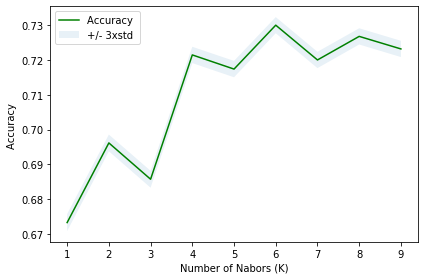

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

From this graph we can know the most accurate k is 6.
Therefore we use k=6 and do the k-nearest method.

In [24]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [25]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 1, 1, 1])

use the jaccard similarity score to define the accuracy of this method.

In [26]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7300636977500752

Next we will use the decision tree model. Since we have already split the training set and test set, we can use the previous set to train this model.

In [27]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DecTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
predTree = DecTree.predict(X_test)
print (predTree [0:5])

[2 1 1 1 1]


Similarly, we apply the jaccard similarity score to define the accuracy of this method.

In [30]:
jaccard_similarity_score(y_test, predTree)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7467672708384592

Next we will try the logistic regression model.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
yhat = LR.predict(X_test)
yhat

array([2, 1, 1, ..., 1, 1, 1])

In [33]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.11099169, 0.88900831],
       [0.81889145, 0.18110855],
       [0.80096873, 0.19903127],
       ...,
       [0.58197904, 0.41802096],
       [0.65548196, 0.34451804],
       [0.76719815, 0.23280185]])

Similarly, we use the jaccard similarity score to define the accuracy.

In [35]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7380190819869324